In [20]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import os
os.chdir('../')
os.getcwd()

'c:\\Users\\jfsal\\Documents\\TFTDataProject'

In [17]:
unit_data = pd.read_csv('data/unitperformancedata.csv')
unit_data[['Games on Patch', 'Percent Appearance']] = unit_data['Frequency'].str.split(' ', expand=True)
unit_data['Percent Appearance'] = unit_data['Percent Appearance'].str.rstrip('%').astype(float)
unit_data['Win Rate'] = unit_data['Win Rate'].str.rstrip('%').astype(float)
unit_data['Games on Patch'] = unit_data['Games on Patch'].str.replace(',', '').astype(int)
unit_data = unit_data.drop(columns=['Frequency'])
unit_data = unit_data.dropna()
unit_data.head()

,Unit,Average Place,Win Rate,Games on Patch,Percent Appearance
0,Warwick,3.05,26.1,174548,8.3
1,Mel,3.06,26.8,144021,6.9
2,Viktor,3.08,25.2,219146,10.4
3,LeBlanc,3.78,18.7,343418,16.4
4,Caitlyn,3.83,17.5,300951,14.3


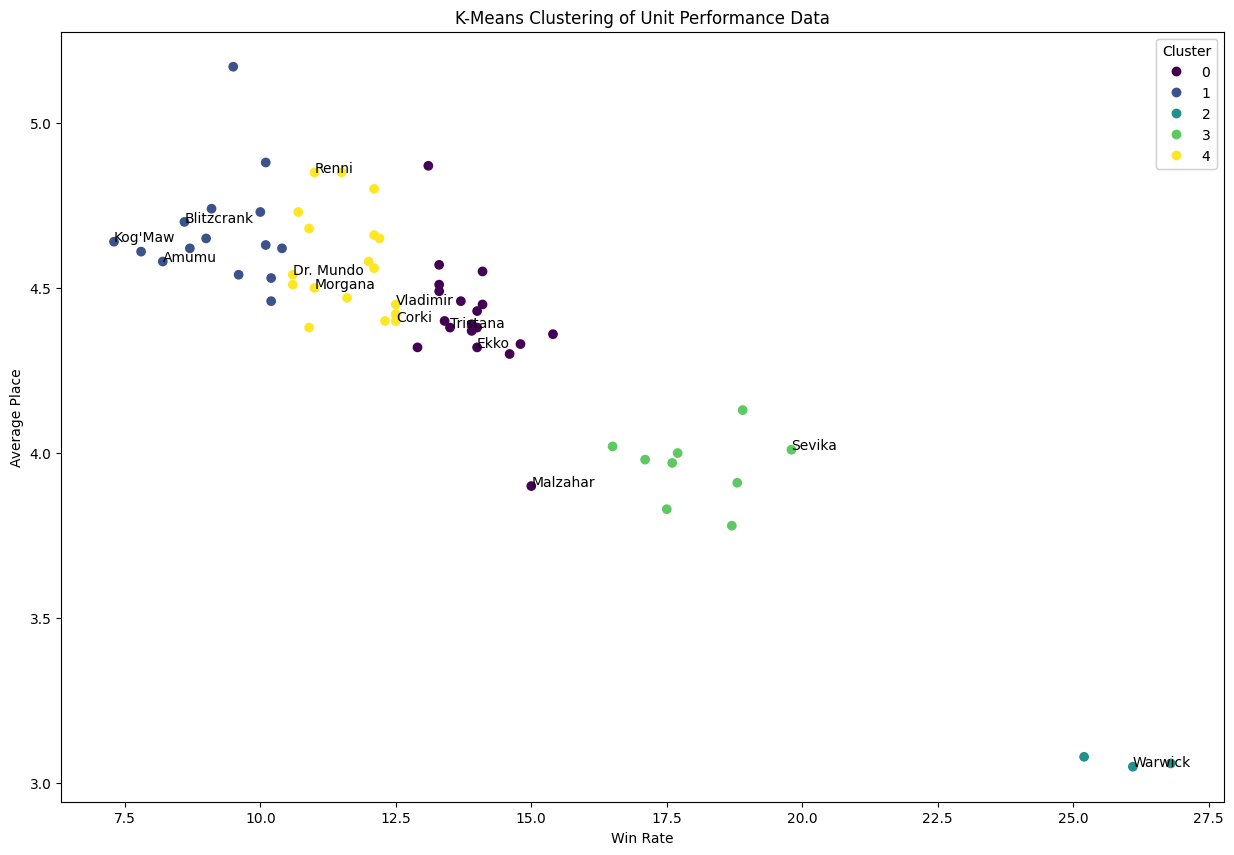

In [28]:
features = unit_data[['Average Place', 'Win Rate']]
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters = 5, random_state = 22)
unit_data['Cluster'] = kmeans.fit_predict(features)


plt.figure(figsize=(15, 10))
scatter = plt.scatter(unit_data['Win Rate'], unit_data['Average Place'], c=unit_data['Cluster'], cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(), title="Cluster")
plt.gca().add_artist(legend1)
for i, unit in unit_data.iterrows():
    if i % 5 == 0:
        plt.annotate(unit['Unit'], (unit['Win Rate'], unit['Average Place']))
plt.xlabel('Win Rate')
plt.ylabel('Average Place')
plt.title('K-Means Clustering of Unit Performance Data')
plt.show()
